In [23]:
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('lvrLH8BhzAmhSCeNFLMcZi3R_zkTnXng')

In [24]:
!pip install jovian --upgrade --quiet

# USA ACCIDENTS EXPLORATORY DATA ANALYSIS
About Dataset :
  - Sourced from Kaggle
  - Contains Information about accidents
  - Can be useful to prevent accidents
  - does not contain data about New York

## Questions And Answers
1. Which 5 states have the highest number of accidents?
2. Does New York appear in the DataSet, considering it id the most populated city in the USA? If yes, why is the accident count lower?
4. What time of day are accidents most frequent?
5. Which days of the week and months have the most accidents?





## Summary And Conclusion
Insights :
- There is no data for New York, despite having the greatest population in the United States

- Miami has the most accidents with 106966, followed by;
2.   Los Angeles with 68956
3.   Orlando with  54691                 
4.   Dallas with 41979
5.   Houston with 39448


- The number of accidents per city dereases exponentially
- Most of the cities (95.8%) have a less than 1000 yearly accidents
- Accidents are most frequent on Mondays, between 14:00 and 18:00



## Download The Data

In [25]:
pip install opendatasets --upgrade --quiet

In [26]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [27]:
#to be used when reading the csv file
data_filename = './us-accidents/US_Accidents_Dec21.csv'

## Data Preparation And Cleaning
- Load file using Pandas
- Look at some information about the file
- Fix missing or incorrect values

In [28]:
#importing pandas for Data exploration
import pandas as pd

#Importing pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
accidents = pd.read_csv(data_filename)

In [30]:
#looking through the columns and data types
accidents.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [31]:
#statistical summaries of dataset
accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [32]:
#Naming columns with numerical values
numerics = ['int16', 'int32', 'int64', 'float64', 'float32', 'float16']
numeric_columns = accidents.select_dtypes(include=numerics)
numeric_columns.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [33]:
#Count of columns with numerical values
numerics = ['int16', 'int32', 'int64', 'float64', 'float32', 'float16']
numeric_columns = accidents.select_dtypes(include=numerics)
len(numeric_columns.columns)

14

In [34]:
#Sum of missing values per column
#accidents.isna().sum().sort_values(ascending=False)

percentage_of_missing_values = accidents.isna().sum().sort_values(ascending=False) / len(accidents) * 100
percentage_of_missing_values

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

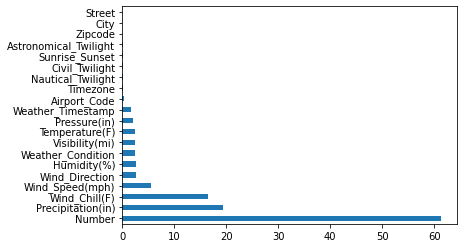

In [35]:
#filtering of column names with mssing values
has_missing_values = percentage_of_missing_values[percentage_of_missing_values != 0 ]

#visualization perentage of columns with missing percentages
has_missing_values.plot(kind='barh')

These are the columns with the most missing values

In [36]:
#Replacing NaN/ missing values with 0
accidents.fillna(0,inplace=True)

## Exploratory Analysis And Visualization
Columns To Analyze :
  1. City
  2. Start Time
  3. Start_Lat, Start_Lng - creating maps
  


###Part 1: Cities

In [37]:
#Overview of column names
accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
#Overview of City column
accidents.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [39]:
#unique cities in the series (a series is a single column of data)
cities = accidents.City.unique()
len(cities)

11682

In [40]:
#counting the number of cities by accidents
cities_by_accidents = accidents.City.value_counts()
cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Horntown                             1
Crooksville                          1
Novinger                             1
Trementina                           1
American Fork-Pleasant Grove         1
Name: City, Length: 11682, dtype: int64

In [41]:
#Working with the top 20 cities by accidents
cities_by_accidents[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

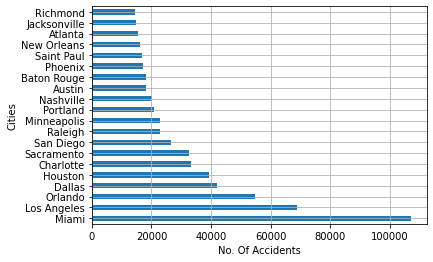

In [42]:
#Visualizing cities by accidents for top 20 cities
cities_by_accidents[:20].plot(kind='barh')

plt.xlabel('No. Of Accidents')
plt.ylabel('Cities')
plt.grid(True)
plt.show()

Bar graph showing top 20 cities with the most number of accidents

In [43]:
#Setting up Seaborn for visualization
sns.set_style('darkgrid')

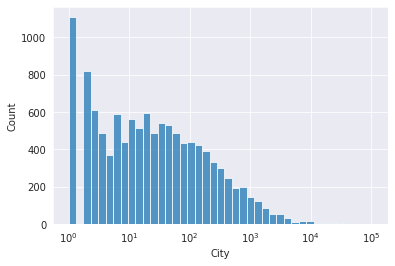

In [44]:
#distribution of the number of accidents across cities
sns.histplot(cities_by_accidents, log_scale=True)

 Most cities have less than 2000 accidents

In [45]:
#Creating a distinction between high and low accident cities
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]

low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]


In [46]:
#Percentage of cities with a high number of accidents
len(high_accident_cities) / len(cities) * 100

4.245848313644924

In [47]:
#Percentage of cities with a low number of accidents
len(low_accident_cities) / len(cities) * 100

#--this confirms, most cities have a low number of accidents

95.75415168635507

[Text(0.5, 1.0, 'High Accident Cities')]

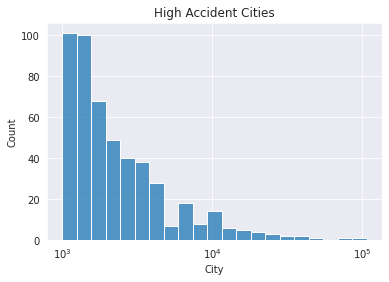

In [48]:
sns.histplot(high_accident_cities, log_scale=True).set(title='High Accident Cities')


High Accident Cities


[Text(0.5, 1.0, 'Low Accident Cities')]

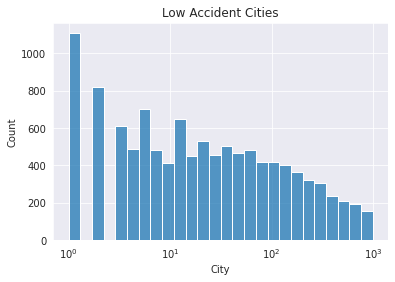

In [49]:
sns.histplot(low_accident_cities, log_scale=True).set(title='Low Accident Cities')


Low Accident Cities

###Part 2: Start Time

In [50]:
#converts the Start time column to date and time format
accidents.Start_Time = pd.to_datetime(accidents.Start_Time)

In [51]:
accidents.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

In [52]:
#extracting the hour from the start time
accidents.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Hour Start Time'),
 Text(0.5, 1.0, 'Accident Percentage By Hours')]

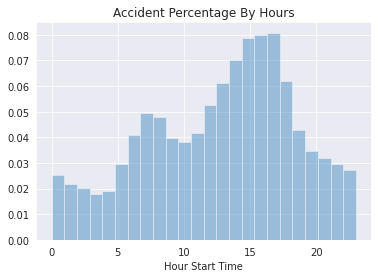

In [53]:
sns.distplot(accidents.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True).set(title='Accident Percentage By Hours', xlabel='Hour Start Time')

- A high percentage of accidents occur between 2pm and 6pm, most probabaly because people are in a hurry to get home from work
- 2nd highest percentage of accidents occurs between 6am and 9am, most probably because people are in a rush to get to work

[Text(0.5, 1.0, 'Accident Percentage By Day Of The Week')]

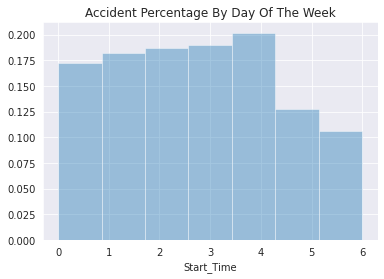

In [54]:
#extracting day of week data
sns.distplot(accidents.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True).set(title='Accident Percentage By Day Of The Week')

- Most of the accidents occur during weekdays

In [55]:
#Is the hour distribution of accidents on weekends the same as on weekdays?
weekends_Start_Time = accidents.Start_Time[(accidents.Start_Time.dt.dayofweek == 6) | (accidents.Start_Time.dt.dayofweek == 5)]

[Text(0.5, 0, 'Weekend Start Time'),
 Text(0.5, 1.0, 'Accident Percentage By Hour Over The Weekend')]

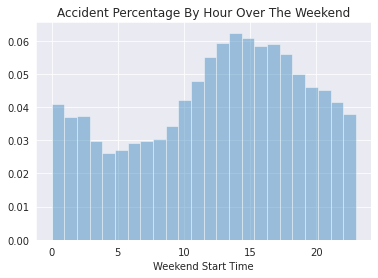

In [56]:
sns.distplot(weekends_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True).set(title='Accident Percentage By Hour Over The Weekend', xlabel='Weekend Start Time')

- On the weekend, the peak occurs between 11 am and 9pm, slightly similar to the weekdays
- The 2nd higest percentage o accidents occurs between 12am and 3am, unlike the weekdays

[Text(0.5, 0, 'Month Start Time'),
 Text(0.5, 1.0, 'Accident Percentage By Month For The Year 2020')]

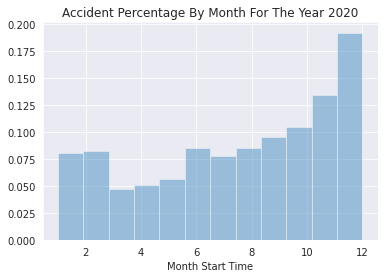

In [57]:
#Year extraction from Timestamp for the COVID Pandemic
accidents_2021 = accidents[accidents.Start_Time.dt.year == 2021]
sns.distplot(accidents_2021.Start_Time.dt.month, bins=12, kde=False, norm_hist=True,).set(title='Accident Percentage By Month For The Year 2020', xlabel='Month Start Time')

- Much Data is missing for the year 2019

###Part 3: Start Latitude & Start Longitude

In [58]:
#Overview of the accident starting Latitudes
accidents.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

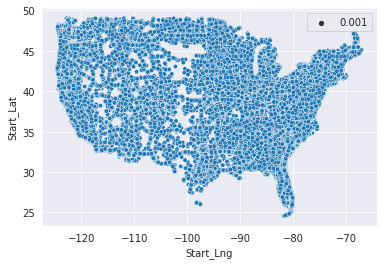

In [59]:
sns.scatterplot(x=accidents.Start_Lng, y=accidents.Start_Lat, size=0.001)

In [60]:
#iporting folium library to create maps
import folium
from folium.plugins import HeatMap

In [61]:
#returns a list of latitude and longitudinal pairs 
#zip categorizes the latitudes and longitudes into pairs
zip(list(accidents.Start_Lat), list(accidents.Start_Lng))

In [62]:
#creating a sample dataset as the dataframe took to long
sample_df = accidents.sample(int(0.001 * len(accidents)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [63]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map